In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
col_names = ['outlook', 'temperature', 'humidity', 'windy', 'play']
feature_cols = ['outlook', 'temperature', 'humidity', 'windy']

data = pd.read_csv("./weather.nominal.csv", header=0, names=col_names, encoding='ISO-8859-1')

# Pré-processamento
data = data.values

label_encoder = LabelEncoder()
data[:,3] = label_encoder.fit_transform(data[:,3]).astype('int') 
data[:,4] = label_encoder.fit_transform(data[:,4]).astype('int')
data = pd.DataFrame(data, columns=col_names)

X = data[feature_cols] # Atributos de entrada
Y = data.play # Atributo de classificação
Y = Y.astype('int')

X = pd.get_dummies(X, columns=['outlook', 'temperature', 'humidity'])

# Divisão dos dados de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 80/20

# Treinamento
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)

# Teste
y_pred = model.predict(X_test)

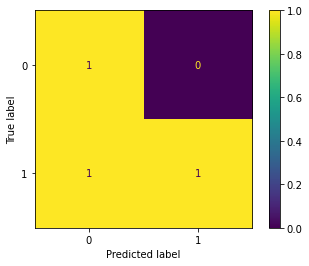

TPR: 1.0
FNR: 0.0
TNR: 0.5
FPR: 0.5
Precision: 0.5
F1 Score: 0.6666666666666666
Accuracy: 0.6666666666666666


In [3]:
# Matriz de Confusão
matrix = confusion_matrix(y_test.values, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
disp.plot()
plt.show()

# Cálculo das métricas
TP = matrix[0][0]
TN = matrix[1][1]
FP = matrix[1][0]
FN = matrix[0][1]
accuracy = accuracy_score(y_test, y_pred)

print("TPR:", TP/(TP+FN))
print("FNR:", FN/(TP+FN))
print("TNR:", TN/(TP+FP))
print("FPR:", FP/(FP+TN))
print("Precision:", TP/(TP+FP))
print("F1 Score:", (2*TP)/(2*TP+FP+FN))
print("Accuracy:", accuracy)

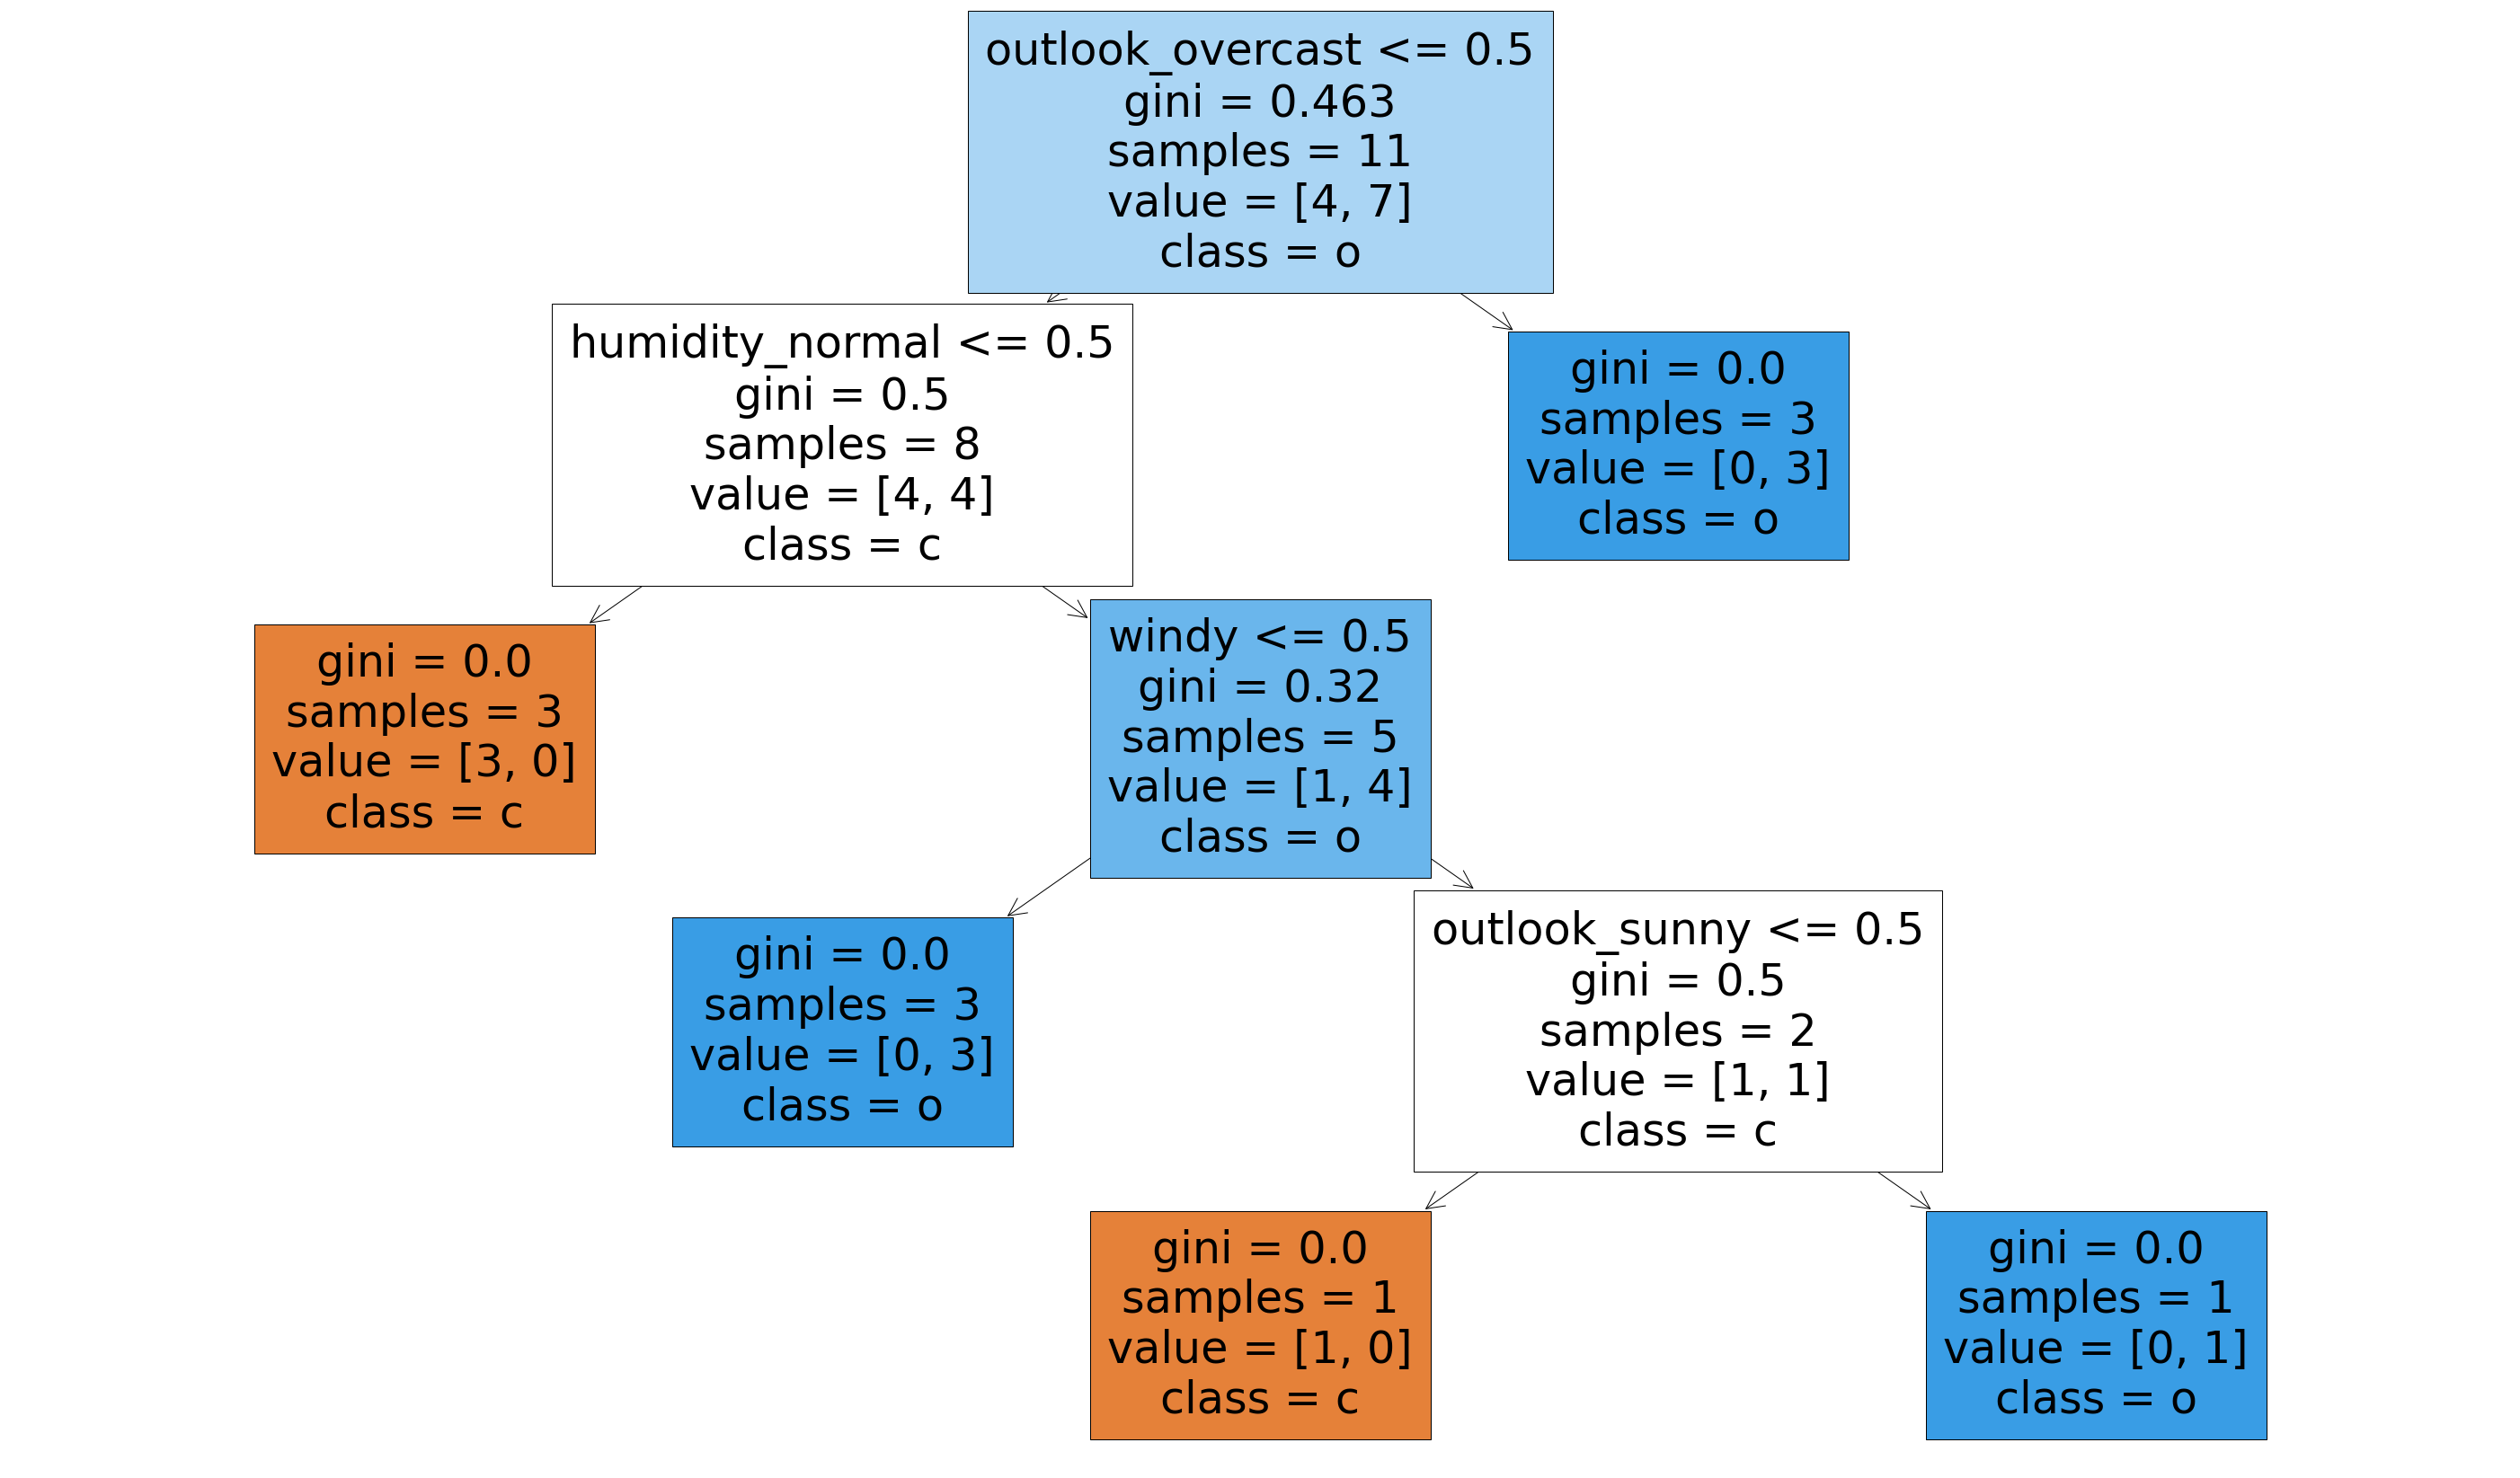

In [4]:
# Mostrando a árvore
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(model, feature_names=list(X_train.columns), class_names='conc', filled='true')